# The Wilson-Cowan Model in Neurolib: Parameter Breakdown (Single Node)

The **Wilson-Cowan (WC) model** is a fundamental population model that describes how the **average activity** of **excitatory (E)** and **inhibitory (I)** neuron groups evolves over time. In this setup, we're simulating a **single, isolated WC unit**—think of it as a single "brain region"—without explicit network connections to other nodes.

The **fundamental ordinary differential equations (ODEs)** governing the dynamics of this single node are:

$$\tau_E \frac{dE}{dt} = -E + (1 - E) S_E \left( c_{EE} E - c_{IE} I + \text{Input}_{E,ext} + \eta_E \right)$$

$$\tau_I \frac{dI}{dt} = -I + (1 - I) S_I \left( c_{EI} E - c_{II} I + \text{Input}_{I,ext} + \eta_I \right)$$

Where the activation (sigmoid) functions are:
$S_E(x) = \frac{1}{1 + e^{-a_{exc}(x - \mu_{exc})}}$
$S_I(x) = \frac{1}{1 + e^{-a_{inh}(x - \mu_{inh})}}$

The $(1-E)$ and $(1-I)$ terms in the equations ensure that the activity of the excitatory and inhibitory populations is **limited between 0 and 1**, a common feature in some WC model formulations.

**Important Note:** Since this simulation focuses on a **single node**, and no connectivity (`Cmat`) or delay (`Dmat`) matrices are passed, parameters related to global coupling and delays (like the $\sum K_{gl} C_{nl} E_l(t-D_{nl})$ term from the original code) **do not affect the dynamics of this specific model instance**. Parameters such as `K_gl`, `Cmat`, `Dmat`, and `signalV` might be present in `model.params`, but they'll be inactive or irrelevant for a single node.

---

## Mapping Formula Variables to `model.params` in Neurolib

Here's a detailed breakdown of each variable from the equations and its correspondence to the `neurolib` model parameters for a single WC node:

* ### **$E(t)$ and $I(t)$ (Excitatory and Inhibitory Activity)**
    * **TLDR**: These represent the **average firing rate** (or activity level) of the excitatory and inhibitory neuronal populations within our single node. They are the **primary outputs** of your simulation, with values normalized between 0 and 1.
    * **Model Variables**:
        * Excitatory Activity: `model.outputs['exc']`
        * Inhibitory Activity: `model.outputs['inh']`
    * **Data Shape**: For a single node, both `model.outputs['exc']` and `model.outputs['inh']` will have a shape of `(1, num_time_steps)`. To plot, simply access the first (and only) row: `model.outputs['exc'][0, :]`.

* ### **$\tau_E$, $\tau_I$ (Time Constants)**
    * **TLDR**: These constants dictate the **speed** at which each population adjusts its activity in response to changes in its inputs. A larger $\tau$ value implies a slower response or greater "inertia."
    * **Model Variables**:
        * $\tau_E \rightarrow$ `model.params['tau_exc']` (Default value in code: `10.0 ms`)
        * $\tau_I \rightarrow$ `model.params['tau_inh']` (Default value in code: `10.0 ms`)

* ### **$S_E(\cdot)$, $S_I(\cdot)$ (Activation Functions / Sigmoids)**
    * **TLDR**: These functions transform the **net sum of synaptic inputs** into an actual **firing rate** (or activity level) for the population. They are crucial for generating the non-linear behavior and oscillations.
    * **Key Parameters**:
        * **Slope (Gain)**: Determines how "steep" the sigmoid is, indicating how sensitive the population is to changes in its input.
            * $a_E \rightarrow$ `model.params['a_exc']` (Default value: `1.0`)
            * $a_I \rightarrow$ `model.params['a_inh']` (Default value: `1.0`)
        * **Threshold ($\mu$)**: Defines the inflection point of the sigmoid—the input level at which the population begins to activate significantly.
            * $\mu_E \rightarrow$ `model.params['mu_exc']` (Default value in code: `2.0`)
            * $\mu_I \rightarrow$ `model.params['mu_inh']` (Default value in code: `4.0`)

* ### **$c_{XY}$ (Intrinsic Connectivity Weights)**
    * **TLDR**: These control the **strength of synaptic interactions within this single node**, meaning how one population influences itself or the other.
    * **Model Variables**:
        * $c_{EE}$ (Excitatory to Excitatory): `model.params['c_excexc']` (Default value in code: `12.0`)
        * $c_{EI}$ (Excitatory to Inhibitory): `model.params['c_excinh']` (Default value in code: `10.0`)
        * $c_{IE}$ (Inhibitory to Excitatory): `model.params['c_inhexc']` (Default value in code: `10.0`)
        * $c_{II}$ (Inhibitory to Inhibitory): `model.params['c_inhinh']` (Default value in code: `2.0`)

* ### **$\text{Input}_{E,ext}$ and $\text{Input}_{I,ext}$ (Basal External Inputs)**
    * **TLDR**: These represent a **constant input current** that each population (E or I) receives from **outside** the node's internal dynamics. Think of this as a tonic external drive.
    * **Model Variables**:
        * $\text{Input}_{E,ext} \rightarrow$ `model.params['exc_ext']` (This parameter is key for exploring different dynamic regimes, such as transitioning from low-firing states to oscillations and then to high tonic firing).
        * $\text{Input}_{I,ext} \rightarrow$ `model.params['inh_ext']` (Often defaults to `0.0` or a fixed low value in `neurolib`).

* ### **$\eta_E$, $\eta_I$ (Stochastic Noise Terms)**
    * **TLDR**: These introduce **random fluctuations** into the inputs, simulating the inherent biological variability in neural systems. They are modeled as Ornstein-Uhlenbeck processes.
    * **Key Parameters**:
        * **Noise Intensity ($\sigma_{ou}$)**: Controls the amplitude of these random fluctuations.
            * $\sigma_{ou} \rightarrow$ `model.params['sigma_ou']` (Default value: `0.1`).
        * **Noise Mean ($\mu_{ou}$)**: The average value around which the noise fluctuates.
            * $\mu_{ou,exc} \rightarrow$ `model.params['exc_ou_mean']` (Default value: `0.0`).
            * $\mu_{ou,inh} \rightarrow$ `model.params['inh_ou_mean']` (Default value: `0.0`).
        * **Noise Time Constant ($\tau_{ou}$)**: How quickly the noise fluctuations change. A larger value means slower, more correlated fluctuations over time.
            * $\tau_{ou} \rightarrow$ `model.params['tau_ou']` (Default value: `10.0 ms`).


--- Simulating Regime: Subcritical ---


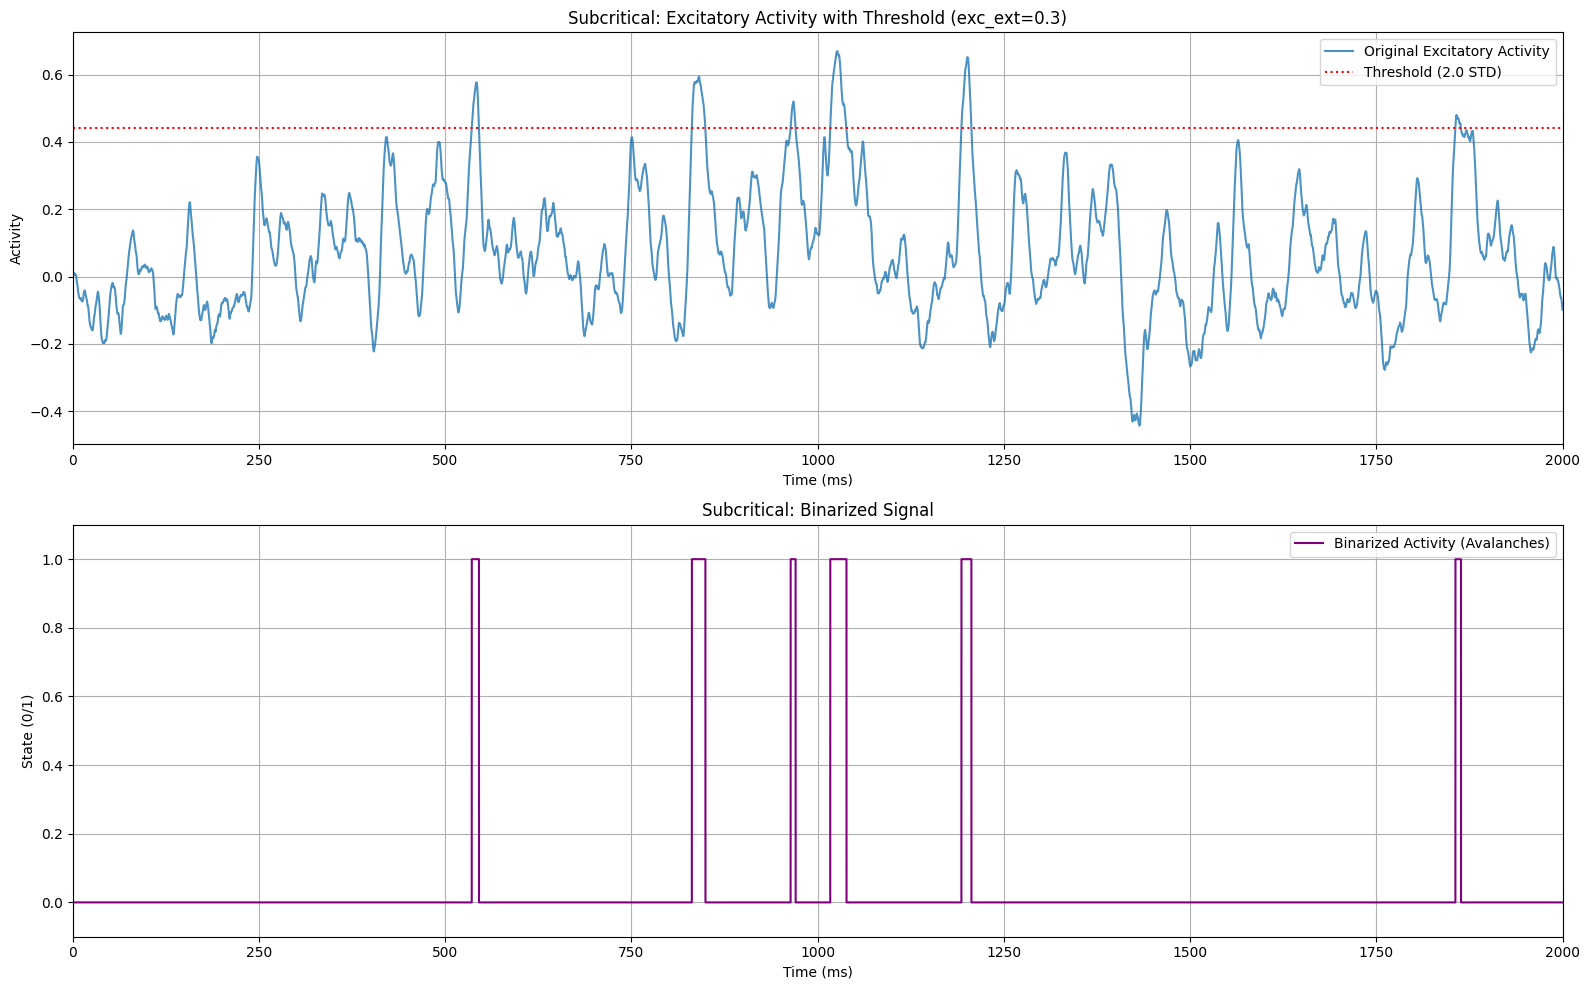

  Binarization threshold for Subcritical: 0.4401
  Subcritical simulation completed.

--- Simulating Regime: Critical ---


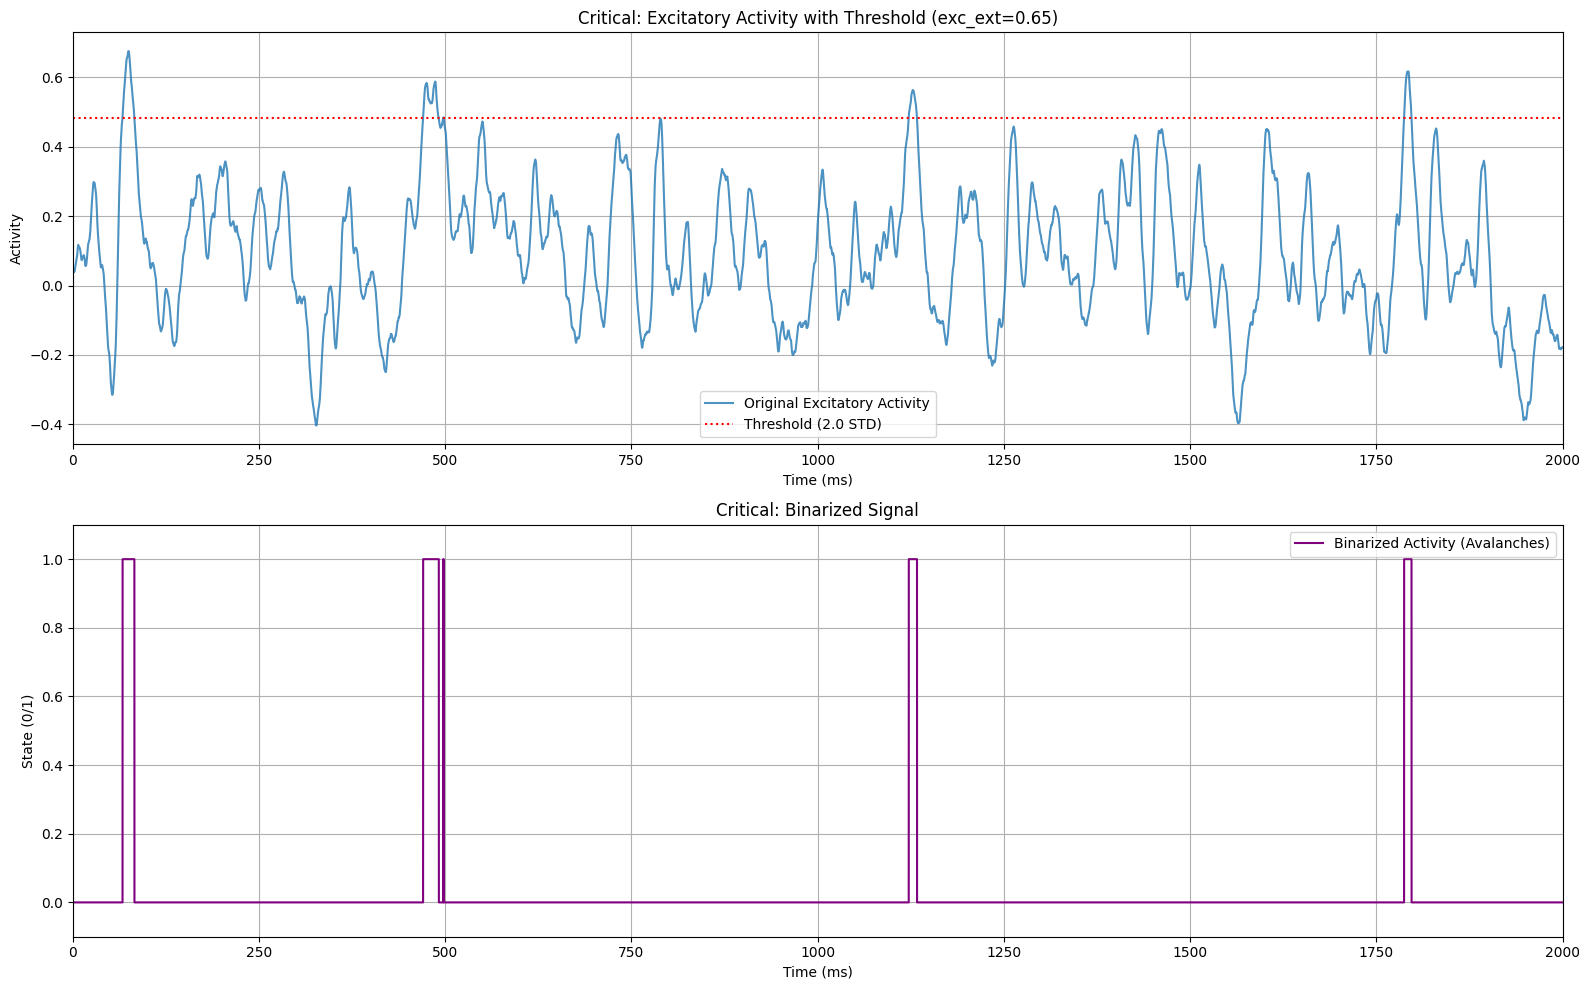

  Binarization threshold for Critical: 0.4827
  Critical simulation completed.

--- Simulating Regime: Hypercritical ---


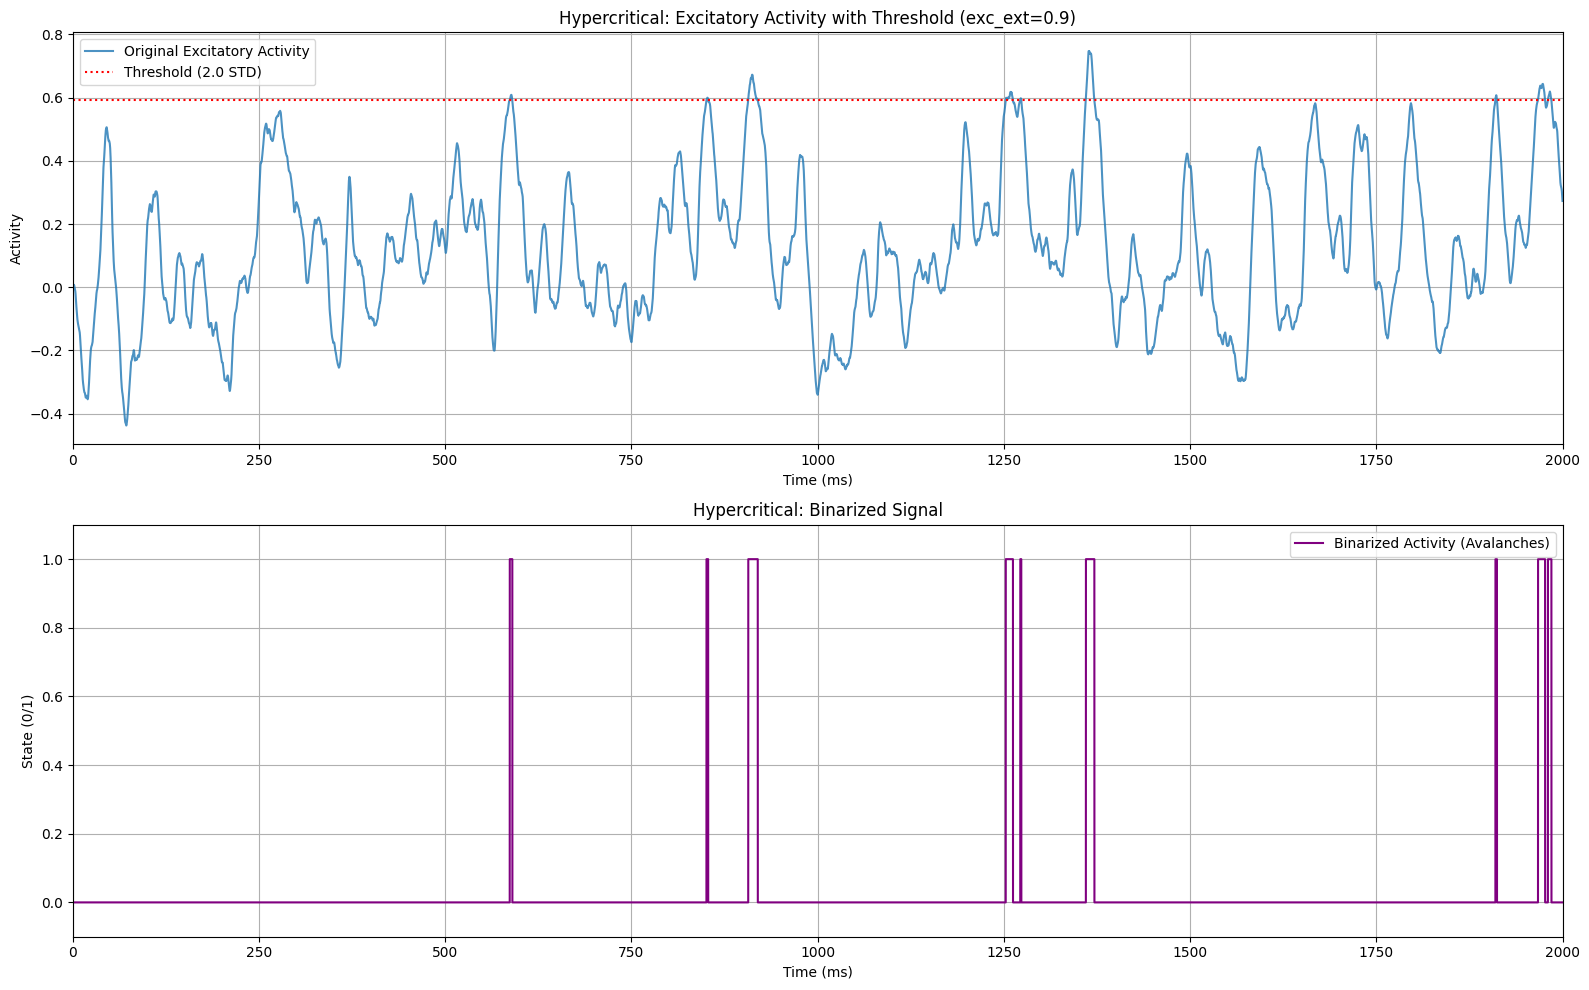

  Binarization threshold for Hypercritical: 0.5922
  Hypercritical simulation completed.

Dynamic regime exploration finished.


In [2]:
import neurolib.models.wc as wc
import numpy as np
import matplotlib.pyplot as plt

# Simulation duration
duration = 20 * 1000 # 20,000 ms = 20 seconds

# Threshold multiplier for binarization (kept consistent)
threshold_multiplier = 2.0

# --- Definition of dynamic regimes ---
regimes = {
    "Subcritical": {
        'exc_ext': 0.30,  # Lower external input: activity decays.
        'sigma_ou': 0.14,
        'plot_xlim_start': 0, # Start of plotting range
        'plot_xlim_end': 2000 # End of plotting range (for better visualization of dynamics)
    },
    "Critical": {
        'exc_ext': 0.65,  # External input 'just at the edge' for complex dynamics
        'sigma_ou': 0.14,
        'plot_xlim_start': 0,
        'plot_xlim_end': 2000
    },
    "Hypercritical": {
        'exc_ext': 0.90,  # Higher external input: sustained/oscillatory activity.
        'sigma_ou': 0.14,
        'plot_xlim_start': 0,
        'plot_xlim_end': 2000
    }
}

# Other Wilson-Cowan model parameters (constant across regimes to isolate exc_ext effect)
common_wc_params = {
    'a_exc': 1.0,
    'a_inh': 1.0,
    'tau_exc': 10.0,
    'tau_inh': 10.0,
    'c_exc': 10.0,
    'c_inh': 10.0,
}

# Iterate over each regime, simulate, and plot
for regime_name, params in regimes.items():
    print(f"\n--- Simulating Regime: {regime_name} ---")

    # Create a new WC model for each regime
    model = wc.WCModel() # No Cmat/Dmat here, as it's a single node
    model.duration = duration

    # Assign specific parameters for the current regime
    model.params['exc_ext'] = params['exc_ext']
    model.params['sigma_ou'] = params['sigma_ou']

    # Assign common WC parameters
    for p_name, p_val in common_wc_params.items():
        model.params[p_name] = p_val

    # Run the simulation
    model.run()

    # Extract results
    time = model.outputs["t"]
    exc_activity = model.outputs["exc"][0] # [0] because it's a single node simulation

    # Calculate and binarize the signal
    mean_activity = np.mean(exc_activity)
    std_activity = np.std(exc_activity)
    threshold = mean_activity + threshold_multiplier * std_activity
    binary_exc_activity = (exc_activity > threshold).astype(int)

    # Plot original and binarized signal
    plt.figure(figsize=(16, 10))

    # Subplot 1: Original signal and threshold
    plt.subplot(2, 1, 1)
    plt.plot(time, exc_activity, label="Original Excitatory Activity", alpha=0.8)
    plt.axhline(y=threshold, color='r', linestyle=':', label=f"Threshold ({threshold_multiplier} STD)")
    plt.title(f"{regime_name}: Excitatory Activity with Threshold (exc_ext={params['exc_ext']})")
    plt.xlabel("Time (ms)")
    plt.ylabel("Activity")
    plt.grid(True)
    plt.legend()
    # Adjust X-axis range for better visualization
    plt.xlim(params['plot_xlim_start'], params['plot_xlim_end'])

    # Subplot 2: Binarized signal
    plt.subplot(2, 1, 2)
    plt.plot(time, binary_exc_activity, label="Binarized Activity (Avalanches)", color='purple', drawstyle='steps-post')
    plt.title(f"{regime_name}: Binarized Signal")
    plt.xlabel("Time (ms)")
    plt.ylabel("State (0/1)")
    plt.grid(True)
    plt.legend()
    plt.xlim(params['plot_xlim_start'], params['plot_xlim_end'])
    plt.ylim(-0.1, 1.1)

    plt.tight_layout()
    plt.show()

    print(f"  Binarization threshold for {regime_name}: {threshold:.4f}")
    print(f"  {regime_name} simulation completed.")

print("\nDynamic regime exploration finished.")